## The Titanic Problem

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [118]:
#Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing data
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### EDA

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lang, Mr. Fang",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


The dataset has 2 columns with both categorical and continious data along with null values
hence, the data needs to be enriched with values in columns Cabin 


 Ticket and Cabins shared.Among 891 rows, 577 were Male and the rest were Female.
 
The Label will be 'Survived' and same has to be predicted 

In [17]:
# Survivor list 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# Survivior based on Class
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

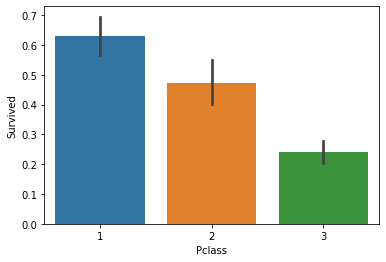

In [22]:
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

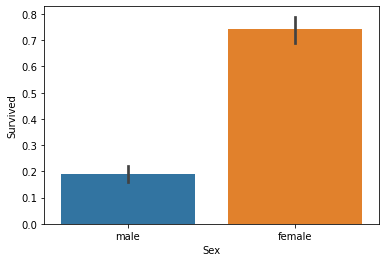

In [24]:
sns.barplot(x='Sex', y='Survived', data=df)

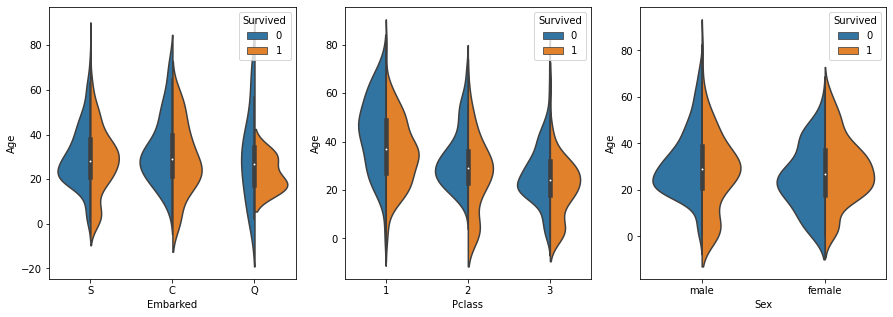

In [58]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)
plt.show()

we see a surge count of children (lestt than 18) survived.
Younger people of 1st Pclass survived as compared to its older people.
From Sex violinplot, we can see that:

Most male children (between age 0 to 14) survived.
Females with age between 18 to 40 have better survival chance.

### Visualization

In [44]:
df_corr=df.corr()
df_corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<AxesSubplot:>

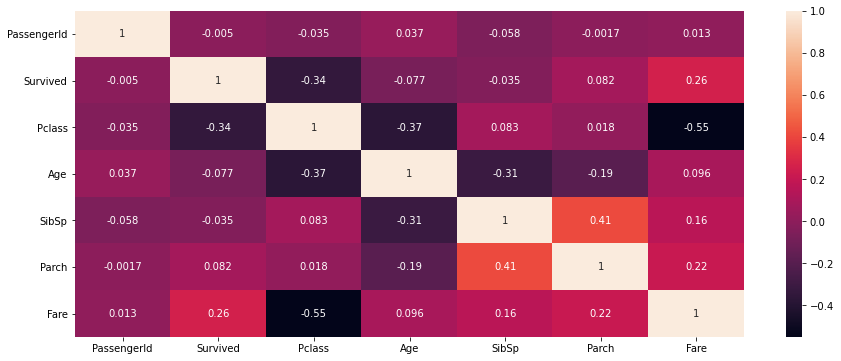

In [47]:
df_corr=df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_corr, annot=True)

In [62]:
#For Missing  values 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [61]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [70]:
df.groupby('Title').Survived.value_counts()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            17
Miss      1           127
          0            55
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [73]:
#for ease keeping the general salutaion
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

In [74]:
df.groupby('Title').Survived.value_counts()

Title   Survived
Master  1            23
        0            17
Miss    1           127
        0            55
Mlle    1             2
Mme     1             1
Mr      0           436
        1            81
Mrs     1            99
        0            26
Ms      1             1
Others  0            15
        1             8
Name: Survived, dtype: int64

In [75]:
#Data Manipulation 
from sklearn.preprocessing import LabelEncoder
lab_enc =LabelEncoder()
# Categorical data will not have any outliers 

df['Title']  = lab_enc.fit_transform(df['Title'])
 # feature encoding complete completed       

In [77]:
df['Sex']  = lab_enc.fit_transform(df['Sex'])

In [82]:
df['Embarked'] = df['Embarked'].fillna('S')

In [84]:
df['Embarked']  = lab_enc.fit_transform(df['Embarked'])

In [85]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [86]:
# divinding  in groups  of 80/5= 5  since max(age 80)
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.

In [88]:
# Train Test Split 
# Setting X and y axis and splitting the data into train and test respectively.
x = df.drop(['Name','Survived', 'SibSp', 'Parch', 'Ticket', 'Cabin'],axis =1)
y = df['Survived']

Finding Best Random state

In [97]:
#Finding Best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxaccu =0
rs =0
for i in range(1,100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=i)   
    lr = LogisticRegression()
    lr.fit(xtrain,ytrain)
    predrf =lr.predict(xtest)
    acc= accuracy_score(ytest,predrf)
    if acc>maxaccu :
        maxaccu =acc
        rs=i
rs

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

6

In [98]:
print('BEst Random Sate',rs)

BEst Random Sate 6


In [99]:
 #plitting the data into train and test respectively
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=6)   

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [101]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred =LR.predict(xtest)
acc_LR= accuracy_score(ytest,ypred)
print('Accuracy_LR',acc_LR)
print('\n Classification Report_LR')
print(classification_report(ytest,ypred))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,ypred))

Accuracy_LR 0.8097014925373134

 Classification Report_LR
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       174
           1       0.77      0.66      0.71        94

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.81      0.81      0.81       268


 Confusion Matrix
[[155  19]
 [ 32  62]]


C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
#2 K Nearest neighbour 
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)
yknn =KNN.predict(xtest)
acc_KNN= accuracy_score(ytest,yknn)
print('Accuracy_KNN',acc_LR)
print('\n Classification Report_KNN')
print(classification_report(ytest,yknn))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,yknn))

Accuracy_KNN 0.8097014925373134

 Classification Report_KNN
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       174
           1       0.52      0.48      0.50        94

    accuracy                           0.66       268
   macro avg       0.62      0.62      0.62       268
weighted avg       0.65      0.66      0.66       268


 Confusion Matrix
[[132  42]
 [ 49  45]]


In [103]:
#3 DT 
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
ydt =DT.predict(xtest)
acc_DT= accuracy_score(ytest,ydt)
print('Accuracy_DT',acc_DT)
print('\n Classification Report_KNN')
print(classification_report(ytest,ydt))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,ydt))

Accuracy_DT 0.7276119402985075

 Classification Report_KNN
              precision    recall  f1-score   support

           0       0.83      0.72      0.78       174
           1       0.59      0.73      0.65        94

    accuracy                           0.73       268
   macro avg       0.71      0.73      0.71       268
weighted avg       0.75      0.73      0.73       268


 Confusion Matrix
[[126  48]
 [ 25  69]]


In [104]:
#4 Randon Forest 
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(xtrain,ytrain)
yrf=RF.predict(xtest)
acc_RF= accuracy_score(ytest,yrf)
print('Accuracy_Random_Forest',acc_RF)
print('\n Classification Report_RF')
print(classification_report(ytest,yrf))
print('\n Confusion Matrix')
print(confusion_matrix(ytest,yrf))

Accuracy_Random_Forest 0.7985074626865671

 Classification Report_RF
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       174
           1       0.72      0.70      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268


 Confusion Matrix
[[148  26]
 [ 28  66]]


In [109]:
#Cross Validation 
cvLR =cross_val_score(LR,x,y,cv=7)
cvKNN =cross_val_score(KNN,x,y,cv=7)
cvDT =cross_val_score(DT,x,y,cv=7)
cvRF =cross_val_score(RF,x,y,cv=7)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score KNN',cvKNN.mean())
print ('\n CV score DT',cvDT.mean())
print ('\n CV score RF',cvRF.mean())

C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lipika-Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi


 CV score LR 0.7856439820022497

 CV score KNN 0.5364876265466817

 CV score DT 0.7687798790776154

 CV score RF 0.8160151856017999


In [110]:
# Model to be Considered 
Accu_Sum =[acc_LR,acc_KNN,acc_DT,acc_RF]
Accu_Sum

[0.8097014925373134,
 0.6604477611940298,
 0.7276119402985075,
 0.7985074626865671]

In [111]:
CV_Score_sum =[cvLR.mean(),cvKNN.mean(),cvDT.mean(),cvRF.mean()]
CV_Score_sum


[0.7856439820022497,
 0.5364876265466817,
 0.7687798790776154,
 0.8160151856017999]

In [112]:
x =[(Accu_Sum[0]-CV_Score_sum[0])*100,(Accu_Sum[1]-CV_Score_sum[1])*100,(Accu_Sum[2]-CV_Score_sum[2])*100,(Accu_Sum[3]-CV_Score_sum[3])*100]
x

[2.4057510535063664,
 12.396013464734812,
 -4.116793877910785,
 -1.7507722915232726]

### BEST MODEL after considering Cross Validation will be Random Forest as the difference for it model  is lower amongst all

### HyperParaneter Tuning for RANDOM FOREST

In [113]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[200,700],
            'max_features': ['auto','log2'],
            'max_depth':[4,6,8],
            'criterion' : ['gini']}

In [114]:
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(xtrain,ytrain)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 700]})

In [115]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 700}

In [116]:
from sklearn.ensemble import RandomForestClassifier

RF_MOD = RandomForestClassifier(criterion='gini',
 max_depth= 6,
 max_features= 'auto',
 n_estimators= 700)
RF_MOD.fit(xtrain,ytrain)
yrf_tuned=RF_MOD.predict(xtest)
acc_RF_MOD= accuracy_score(ytest,yrf_tuned)
print('Accuracy_Random_Forest_HYpertuned',acc_RF_MOD)
print('\n Classification Report_RF_MOD')
print(classification_report(ytest,yrf_tuned))
print(confusion_matrix(ytest,yrf_tuned))

Accuracy_Random_Forest_HYpertuned 0.835820895522388

 Classification Report_RF_MOD
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       174
           1       0.83      0.67      0.74        94

    accuracy                           0.84       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.84      0.84      0.83       268

[[161  13]
 [ 31  63]]


In [119]:
#HyperParaneter Tuning for Logistic Regression 

c_space = np.logspace(-5, 8, 15)

pararm_lr ={'C': c_space,
'class_weight' :['dict' or 'balanced'],
'multi_class' :['auto', 'ovr']}
GSV_LR = GridSearchCV(LogisticRegression(),pararm_lr,cv=7)
GSV_LR.fit(xtrain,ytrain)


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'class_weight': ['dict'],
                         'multi_class': ['auto', 'ovr']})

In [120]:
GSV_LR.best_params_

{'C': 19306.977288832535, 'class_weight': 'dict', 'multi_class': 'auto'}

In [121]:
from sklearn.linear_model import LogisticRegression
LR_Tuned = LogisticRegression(C = 19306.977288832535, class_weight= 'dict', multi_class= 'auto')
LR_Tuned.fit(xtrain,ytrain)
y_LR_Tuned =LR_Tuned.predict(xtest)
acc_LR_Tuned= accuracy_score(ytest,y_LR_Tuned)
print('Accuracy_LR_Tuned',acc_LR_Tuned)
print('\n Classification Report_LR_Tuned')
print(classification_report(ytest,y_LR_Tuned))
print('\n Confusion Matrix Report_LR_Tuned')
print(confusion_matrix(ytest,y_LR_Tuned))

Accuracy_LR_Tuned 0.835820895522388

 Classification Report_LR_Tuned
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       174
           1       0.80      0.71      0.75        94

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.84      0.83       268


 Confusion Matrix Report_LR_Tuned
[[157  17]
 [ 27  67]]


### AOC CURVE

In [122]:
# AOC CURVE 
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
roc_auc_score(ytest,y_LR_Tuned)
roc_auc_score(ytest,yrf_tuned)
roc_auc_score(ytest,yrf)
roc_auc_score(ytest,ydt)
roc_auc_score(ytest,yknn)
roc_auc_score(ytest,ypred)

0.7751895328931279

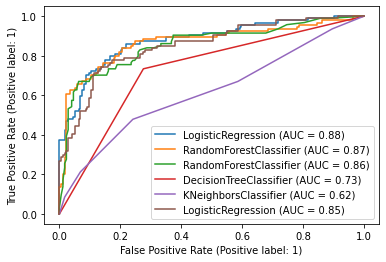

In [123]:
disp = plot_roc_curve(LR_Tuned,xtest,ytest)
disp = plot_roc_curve(RF_MOD,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(RF,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(DT,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(KNN,xtest,ytest,ax=disp.ax_)
disp = plot_roc_curve(LR,xtest,ytest,ax=disp.ax_)
plt.show()

In [124]:
#Saving Model 
import joblib
joblib.dump(LR_Tuned,'Titanic_train_survival_Class.pk1')



['Titanic_train_survival_Class.pk1']

In [125]:
#LOAD and RUN 
Titanic_survival =joblib.load('Titanic_train_survival_Class.pk1')
Titanic_survival_chances = Titanic_survival.predict(xtest)